## 예제 13-1. Kalman Filter 모델 실습

### 위키백과 페이지 조회수 데이터

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents

import warnings
warnings.filterwarnings('ignore')

#### 데이터 불러오기

In [3]:
# Prophet 예제 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])  # 날짜 형식으로 변환
df.set_index('ds', inplace=True)  # 날짜를 인덱스로 설정

In [4]:
# 로그 변환된 방문 수 데이터 선택
df1 = df[(df.index >= '2010-06-01') & (df.index <= '2010-09-30')]
y = df1['y'].values

df1

,y
ds,
2010-06-01,7.192182
2010-06-02,7.249215
2010-06-03,7.419381
2010-06-04,7.562162
2010-06-05,7.433075
...,...
2010-09-26,9.330432
2010-09-27,9.416134
2010-09-28,8.922925


#### Kalman Filter 모델 적합

In [5]:
# 상태 공간 모델 정의 (국소 선형 추세 모형)
model = UnobservedComponents(y, level='local linear trend')

# 칼만 필터 적용
result = model.fit()

#### 모델 예측

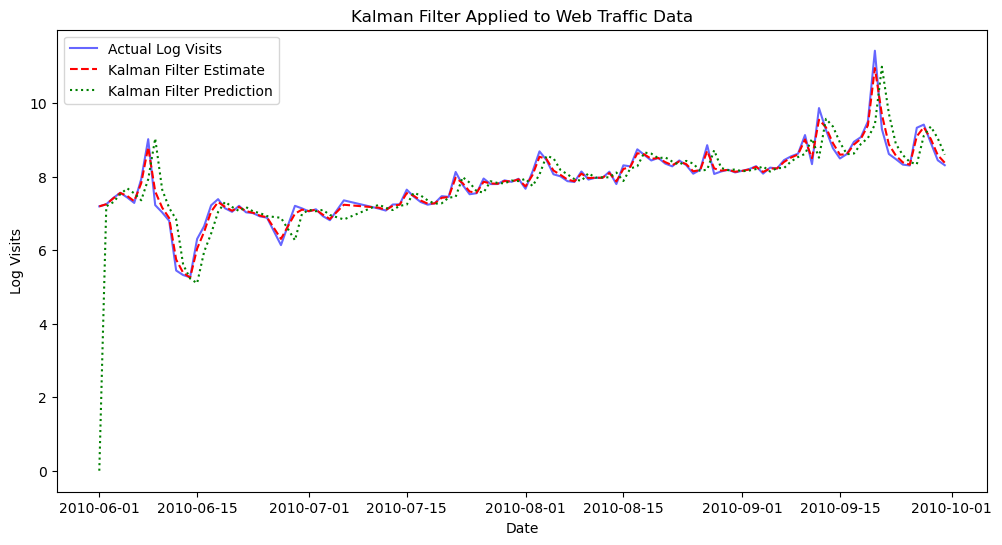

In [6]:
# 필터링된 값 및 예측값 가져오기
filtered_values = result.filtered_state[0]  # 상태 변수 중 수준(level) 부분
predicted_values = result.get_prediction().predicted_mean

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df1.index, y, label='Actual Log Visits', color='blue', alpha=0.6) 
plt.plot(df1.index, filtered_values, label='Kalman Filter Estimate', color='red', linestyle='dashed')
plt.plot(df1.index, predicted_values, label='Kalman Filter Prediction', color='green', linestyle='dotted')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Log Visits")
plt.title("Kalman Filter Applied to Web Traffic Data")
plt.show()